In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('../data/data.csv', encoding='latin1')
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]).dt.normalize()
print(df.shape)
df.head(3)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom


In [46]:
(df['Quantity'] * df['UnitPrice']).std()

np.float64(378.8108235059747)

In [47]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 00:00:00')

In [61]:
# df[df['CustomerID'] == 13748]
# # df[df['Description'] == 'Discount']
# df[(df['CustomerID'] == 14912)
# #    & (df['InvoiceDate'] == '2010-12-08')
#    ]
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09,1.25,17315.0,United Kingdom


In [5]:
df[df['Description'] == '60 TEATIME FAIRY CAKE CASES']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_mode
99,536378,84991,60 TEATIME FAIRY CAKE CASES,24,2010-12-01,0.55,14688.0,United Kingdom,NaN
267,536395,84991,60 TEATIME FAIRY CAKE CASES,24,2010-12-01,0.55,13767.0,United Kingdom,NaN
349,536401,84991,60 TEATIME FAIRY CAKE CASES,3,2010-12-01,0.55,15862.0,United Kingdom,NaN
1287,536532,84991,60 TEATIME FAIRY CAKE CASES,24,2010-12-01,0.55,12433.0,Norway,NaN
1835,536544,84991,60 TEATIME FAIRY CAKE CASES,3,2010-12-01,1.28,NaN,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
537046,581237,84991,60 TEATIME FAIRY CAKE CASES,1,2011-12-08,0.55,15443.0,United Kingdom,NaN
537901,581376,84991,60 TEATIME FAIRY CAKE CASES,6,2011-12-08,0.55,14719.0,United Kingdom,NaN
538409,581405,84991,60 TEATIME FAIRY CAKE CASES,1,2011-12-08,0.55,13521.0,United Kingdom,NaN
538983,581425,84991,60 TEATIME FAIRY CAKE CASES,8,2011-12-08,0.55,14796.0,United Kingdom,NaN


In [68]:
df_grup_products = df.groupby(['Description']).agg(
    {'Quantity': 'sum'}
).reset_index().rename(columns={
    'Quantity': 'Total_Quantity'
})
df_grup_products.sort_values(by='Total_Quantity',ascending=False).head(20)

,Description,Total_Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317
2803,RABBIT NIGHT LIGHT,30680
2161,MINI PAINT SET VINTAGE,26437
2361,PACK OF 12 LONDON TISSUES,26315
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24753


In [31]:
# Ventasas churn
meses_obs = 3
meses_churn = 3
obs_ini = df['InvoiceDate'].min()

ventanas = []
ventana_id = 1

while True:
    obs_end = obs_ini + pd.DateOffset(months=meses_obs) - pd.DateOffset(days=1)
    churn_ini = obs_end + pd.DateOffset(days=1)
    churn_end = churn_ini + pd.DateOffset(months=meses_churn) - pd.DateOffset(days=1)

    if churn_end > df['InvoiceDate'].max():
        break

    df_obs = df[(df['InvoiceDate'] >= obs_ini) & (df['InvoiceDate'] <= obs_end)]
    df_churn = df[(df['InvoiceDate'] >= churn_ini) & (df['InvoiceDate'] <= churn_end)]

    customers_obs = df_obs['CustomerID'].dropna().unique()
    customer_churn = df_churn['CustomerID'].dropna().unique()

    for customer in customers_obs:

        df_cliente = df_obs[df_obs['CustomerID'] == customer].copy()
        df_cliente['quantity_buy'] = np.where(df_cliente['Quantity'] > 0, df_cliente['Quantity'], 0)
        df_cliente['quantity_return'] = np.where(df_cliente['Quantity'] < 0, -df_cliente['Quantity'],0)

        # Compras
        total_compras = df_cliente['quantity_buy'].nunique()
        total_productos_comprados = df_cliente['quantity_buy'].sum()
        total_gasto = (df_cliente['UnitPrice'] * df_cliente['quantity_buy']).sum()
        promedio_monto_factura = total_gasto / total_compras if total_compras > 0 else 0
        promedio_monto_producto = total_gasto / total_productos_comprados if total_productos_comprados > 0 else 0
        productos_unicos_comprados = df_cliente['StockCode'].nunique()

        # Devoluciones
        total_devoluciones = df_cliente['quantity_return'].nunique()
        total_productos_devoluciones = df_cliente['quantity_return'].sum()
        total_gasto_devoluciones = (df_cliente['UnitPrice'] * df_cliente['quantity_return']).sum()
        productos_unicos_devoluciones = df_cliente['StockCode'].nunique()

        # mes frecuente
        mes_frecuente = df_cliente['InvoiceDate'].dt.month.mode()

        # Std compras total
        total_monto_compras_std = ((df_cliente['UnitPrice'] * df_cliente['quantity_buy']) - (df_cliente['UnitPrice'] * df_cliente['quantity_return'])).std()

        # Promedio dias entre compras
        fechas = df_cliente['InvoiceDate'].drop_duplicates().sort_values()
        if len(fechas) > 1:
            diffs = fechas.diff().dropna()
            promedio_dias_entre_compras = diffs.mean().days
        else:
            promedio_dias_entre_compras = np.nan

        # Churn
        churn = 0 if customer in customer_churn else 1

        ventanas.append({
            'CustomerID': customer,
            'ventana_id': ventana_id,
            'total_compras': total_compras,
            'total_productos_comprados': total_productos_comprados,
            'total_gasto': total_gasto,
            'productos_unicos_comprados': productos_unicos_comprados,
            'promedio_monto_factura': promedio_monto_factura,
            'promedio_monto_producto': promedio_monto_producto,
            'total_devoluciones': total_devoluciones,
            'total_productos_devoluciones': total_productos_devoluciones,
            'total_gasto_devoluciones': total_gasto_devoluciones,
            'productos_unicos_devoluciones': productos_unicos_devoluciones,
            'total_monto_compras_std': total_monto_compras_std if not pd.isna(total_monto_compras_std) else 0,
            'promedio_dias_entre_compras': promedio_dias_entre_compras,
            'mes_frecuente': mes_frecuente.iloc[0] if not mes_frecuente.empty else np.nan,
            'churn': churn
        })

    obs_ini = obs_ini + pd.DateOffset(months=meses_obs)
    ventana_id += 1

df_ventanas = pd.DataFrame(ventanas)
df_ventanas = pd.get_dummies(df_ventanas, columns=['mes_frecuente'], prefix='mes', dtype=int)
# df_ventanas['ventana_id'].value_counts()
df_ventanas


,CustomerID,ventana_id,total_compras,total_productos_comprados,total_gasto,productos_unicos_comprados,promedio_monto_factura,promedio_monto_producto,total_devoluciones,total_productos_devoluciones,...,churn,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_12
0,17850.0,1,7,1733,5391.21,24,770.172857,3.110912,5,40,...,1,0,0,0,0,0,0,0,0,1
1,13047.0,1,9,312,825.53,35,91.725556,2.645929,2,1,...,0,0,1,0,0,0,0,0,0,0
2,12583.0,1,18,1394,1907.58,42,105.976667,1.368422,2,1,...,0,1,0,0,0,0,0,0,0,0
3,13748.0,1,1,80,204.00,1,204.000000,2.550000,1,0,...,0,0,0,0,0,0,0,0,0,1
4,15100.0,1,3,80,876.00,1,292.000000,10.950000,4,22,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,17320.0,3,7,168,290.52,25,41.502857,1.729286,1,0,...,1,0,0,0,0,0,0,0,1,0
5765,17777.0,3,8,163,194.70,63,24.337500,1.194479,1,0,...,0,0,0,0,0,0,0,0,1,0
5766,15582.0,3,4,152,237.90,14,59.475000,1.565132,1,0,...,0,0,0,0,0,0,0,0,1,0
5767,16780.0,3,9,172,263.30,40,29.255556,1.530814,1,0,...,1,0,0,0,0,0,0,0,1,0


In [32]:
df_ventanas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     5769 non-null   float64
 1   ventana_id                     5769 non-null   int64  
 2   total_compras                  5769 non-null   int64  
 3   total_productos_comprados      5769 non-null   int64  
 4   total_gasto                    5769 non-null   float64
 5   productos_unicos_comprados     5769 non-null   int64  
 6   promedio_monto_factura         5769 non-null   float64
 7   promedio_monto_producto        5769 non-null   float64
 8   total_devoluciones             5769 non-null   int64  
 9   total_productos_devoluciones   5769 non-null   int64  
 10  total_gasto_devoluciones       5769 non-null   float64
 11  productos_unicos_devoluciones  5769 non-null   int64  
 12  total_monto_compras_std        5769 non-null   f

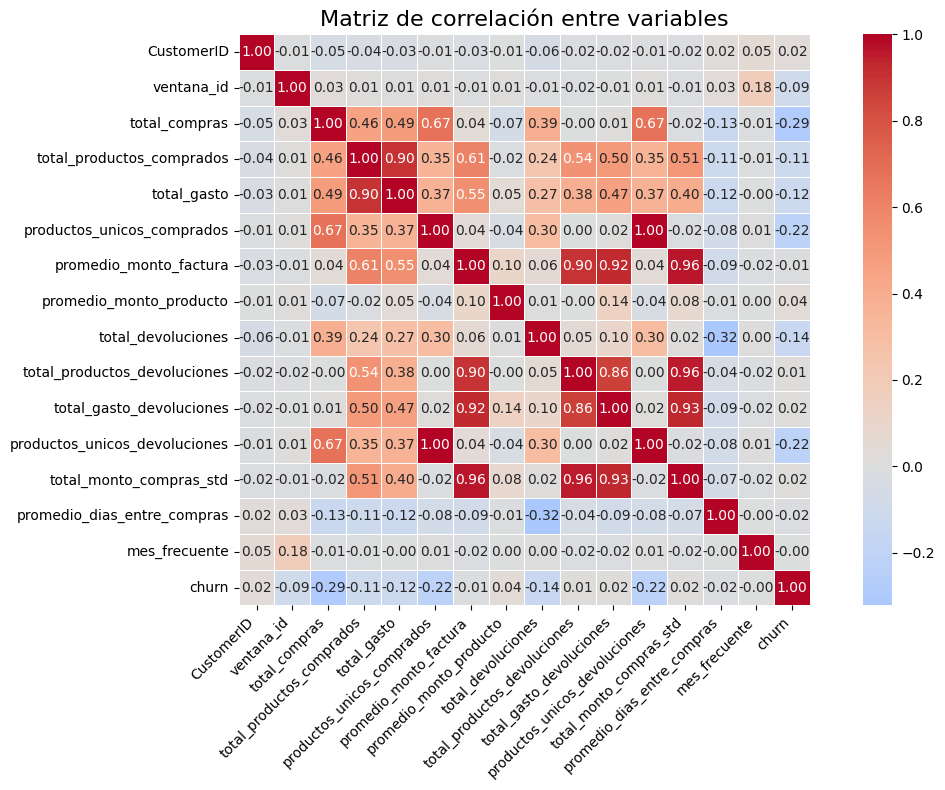

In [16]:
# Si estás usando tu DataFrame final con todas las features + churn
# Filtramos solo las columnas numéricas
df_corr = df_ventanas.select_dtypes(include='number')

# Calculamos la matriz de correlación
corr_matrix = df_corr.corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True, linewidths=0.5)

plt.title("Matriz de correlación entre variables", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

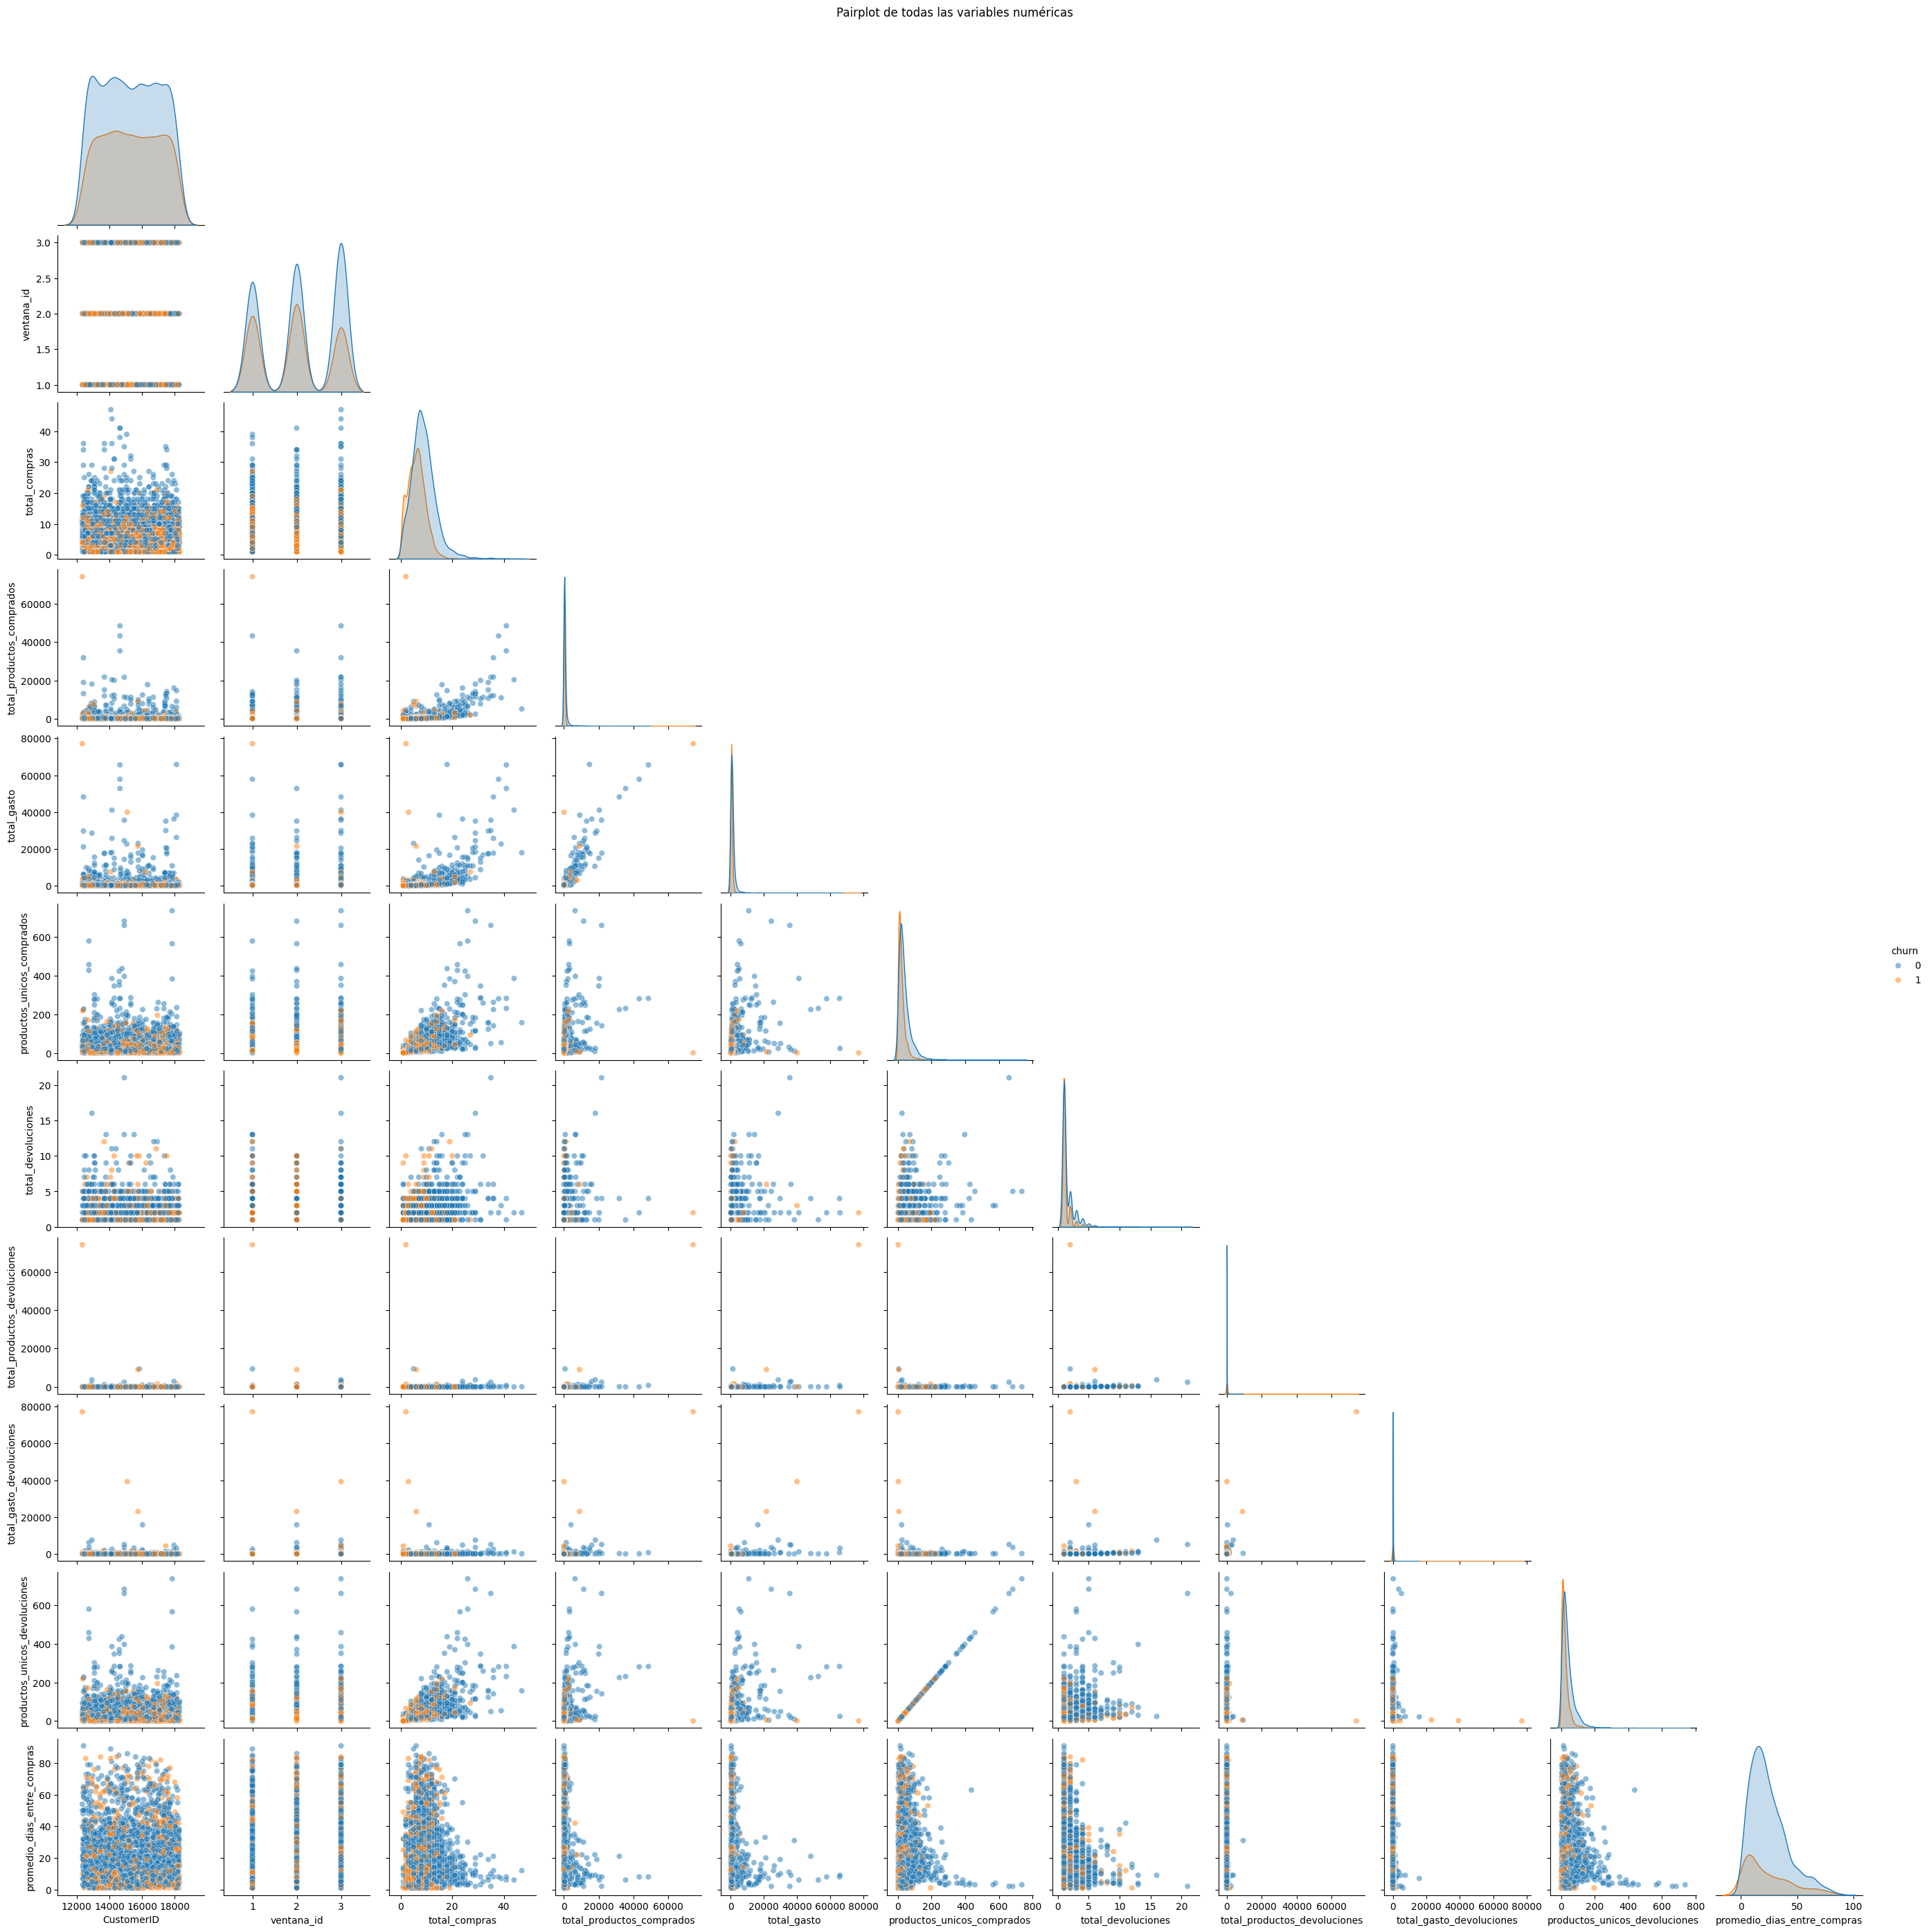

In [23]:
# Seleccionar solo columnas numéricas (incluyendo churn)
df_numericas = df_ventanas.select_dtypes(include='number')

# Asegúrate que 'churn' esté como entero
df_numericas['churn'] = df_numericas['churn'].astype(int)

# Plot
sns.pairplot(df_numericas, hue='churn', corner=True, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot de todas las variables numéricas", y=1.02)
plt.show()

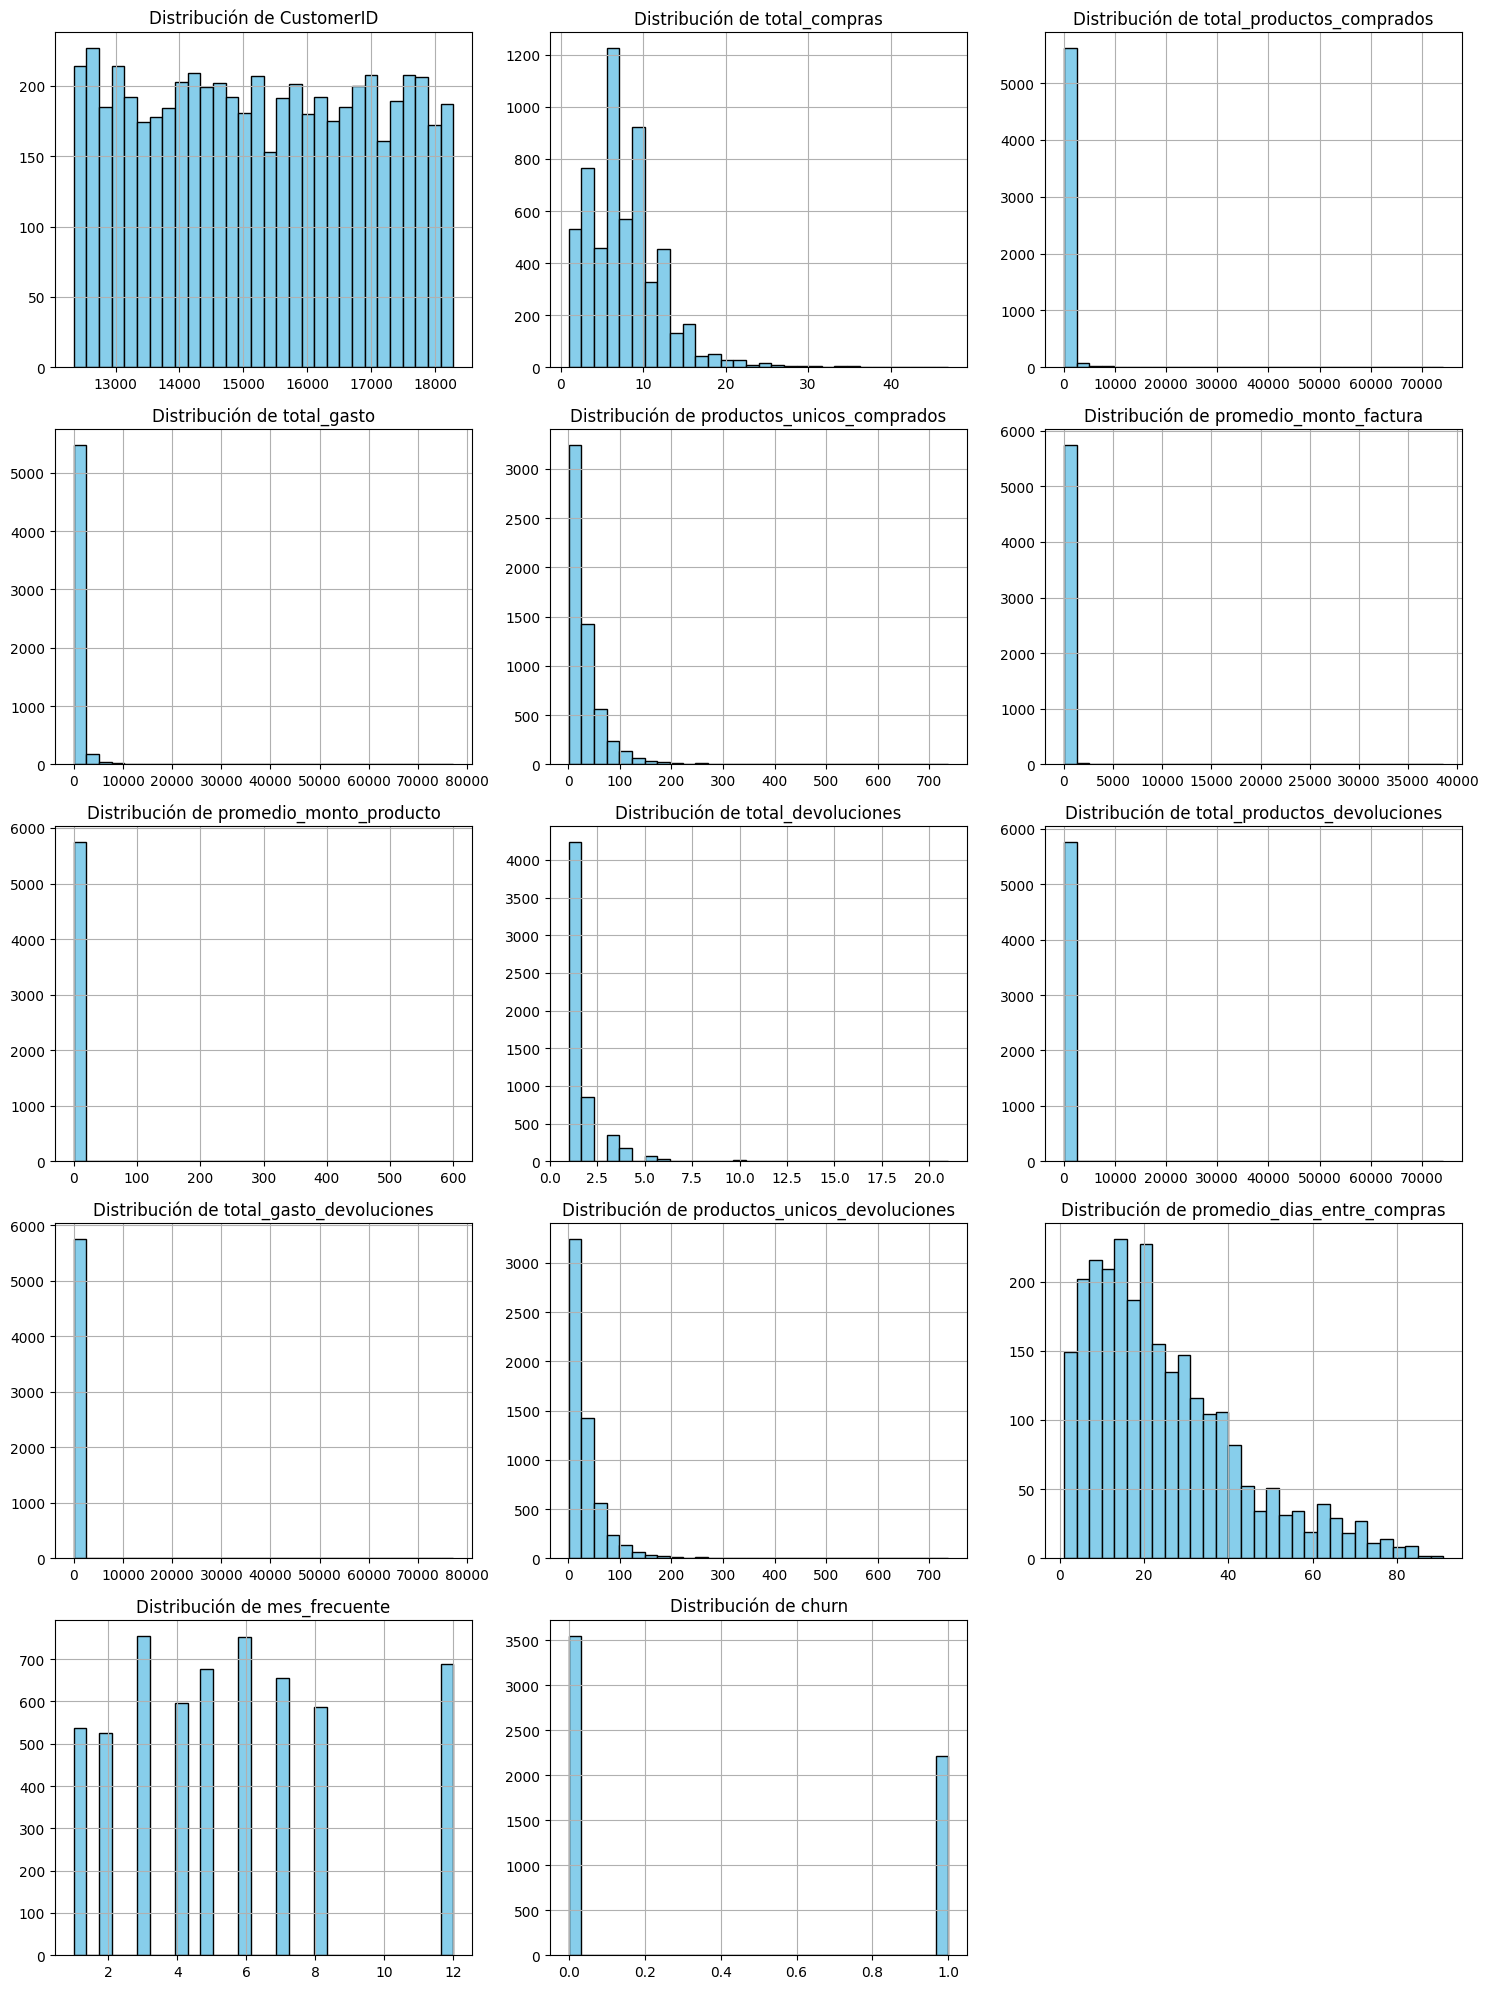

In [27]:
# Seleccionar columnas numéricas (excluyendo 'ventana_id' si no es feature)
# df_hist = df_ventanas[df_ventanas['ventana_id'] == 1].copy()
df_hist = df_ventanas.copy()
df_hist = df_hist.select_dtypes(include='number').drop(columns=['ventana_id'], errors='ignore')

# Crear subplots
num_cols = df_hist.shape[1]
num_rows = (num_cols + 2) // 3  # 3 columnas por fila

plt.figure(figsize=(15, num_rows * 4))

for i, col in enumerate(df_hist.columns, 1):
    plt.subplot(num_rows, 3, i)
    plt.hist(df_hist[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
df_ventanas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     5769 non-null   float64
 1   ventana_id                     5769 non-null   int64  
 2   total_compras                  5769 non-null   int64  
 3   total_productos_comprados      5769 non-null   int64  
 4   total_gasto                    5769 non-null   float64
 5   productos_unicos_comprados     5769 non-null   int64  
 6   promedio_monto_factura         5769 non-null   float64
 7   promedio_monto_producto        5769 non-null   float64
 8   total_devoluciones             5769 non-null   int64  
 9   total_productos_devoluciones   5769 non-null   int64  
 10  total_gasto_devoluciones       5769 non-null   float64
 11  productos_unicos_devoluciones  5769 non-null   int64  
 12  promedio_dias_entre_compras    2646 non-null   f

In [33]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

df_train = df_ventanas[df_ventanas['ventana_id'] == 1].copy()
df_val   = df_ventanas[df_ventanas['ventana_id'] == 2].copy()
df_test  = df_ventanas[df_ventanas['ventana_id'] == 3].copy()

features = df_ventanas.drop(columns=['CustomerID', 'ventana_id', 'churn'], errors='ignore').select_dtypes(include='number').columns.tolist()
target = 'churn'

X_train, y_train = df_train[features], df_train[target]
X_val, y_val     = df_val[features], df_val[target]

In [34]:
ratio = (y_train == 0).sum() / (y_train == 1).sum()

model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=ratio,
    random_state=42
)

# Entrenar
model.fit(X_train, y_train)

# Evaluar en validación
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

print("Classification Report:")
print(classification_report(y_val, y_pred))

print("ROC AUC Score:", roc_auc_score(y_val, y_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1175
           1       0.57      0.55      0.56       852

    accuracy                           0.64      2027
   macro avg       0.63      0.62      0.62      2027
weighted avg       0.63      0.64      0.63      2027

ROC AUC Score: 0.6932084706822496


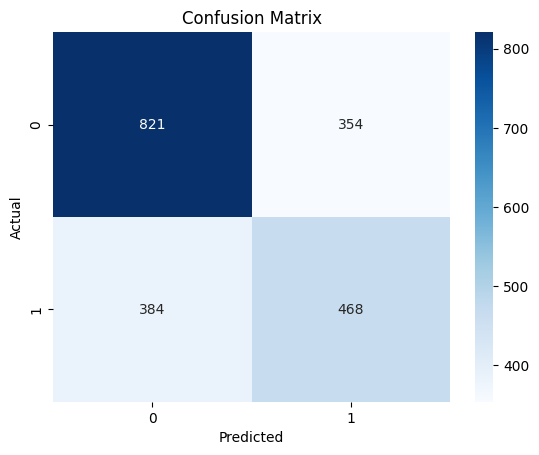

In [35]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
# Lista de modelos con diferentes parámetros
param_list = [
    {'max_depth': 3, 'learning_rate': 0.1},
    {'max_depth': 5, 'learning_rate': 0.1},
    {'max_depth': 3, 'learning_rate': 0.3},
    {'max_depth': 5, 'learning_rate': 0.3},
]

mejores_params = None
mejor_auc = 0

for params in param_list:
    model = XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        **params
    )
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_proba)
    print(f"Params {params} - AUC: {auc:.4f}")

    if auc > mejor_auc:
        mejor_auc = auc
        mejores_params = params

Params {'max_depth': 3, 'learning_rate': 0.1} - AUC: 0.7326
Params {'max_depth': 5, 'learning_rate': 0.1} - AUC: 0.7173
Params {'max_depth': 3, 'learning_rate': 0.3} - AUC: 0.7038
Params {'max_depth': 5, 'learning_rate': 0.3} - AUC: 0.6981


In [37]:
# Entrenar con mejores parámetros
final_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    **mejores_params
)
X_trainval = pd.concat([df_train, df_val])[features]
y_trainval = pd.concat([df_train, df_val])[target]

final_model.fit(X_trainval, y_trainval)

# Test
X_test = df_test[features]
y_test = df_test[target]
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

print("Reporte en Test:")
print(classification_report(y_test, y_pred))
print("ROC AUC Test:", roc_auc_score(y_test, y_proba))

Reporte en Test:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73      1366
           1       0.47      0.62      0.53       627

    accuracy                           0.66      1993
   macro avg       0.63      0.65      0.63      1993
weighted avg       0.69      0.66      0.67      1993

ROC AUC Test: 0.7093155489549109


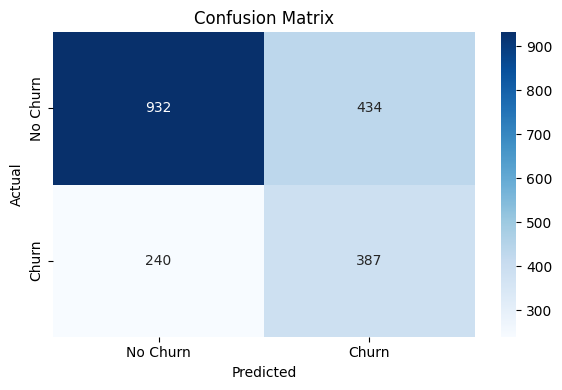

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()